# Automated Machine Learning (AutoML)
Machine learning has become an integral part of modern data-driven applications, but developing effective models often requires in-depth knowledge and expertise. Automated Machine Learning (AutoML) offers a solution to this challenge, empowering users to create powerful models without the need for extensive manual intervention. In this article, we will delve into the concept of AutoML and showcase its capabilities through a complex implementation using the **H2O** AutoML framework in Python.

# Understanding AutoML
Automated Machine Learning simplifies the process of building machine learning models by automating the steps involved in data preprocessing, feature engineering, model selection, and hyperparameter optimization. This significantly reduces the time and effort required to develop high-performing models, making machine learning more accessible to a broader audience.

# Implementation of AutoML using H2O in Python
First, ensure you have the necessary libraries installed:

In [2]:
!pip install h2o
!pip install pandas
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=acee6e255b62494900e07cff40a6b5ccc33bd6d7deae288eff8da902ba6c00f2
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,3 hours and 58 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_6uib9n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.157 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
14:25:08.839: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
14:25:23.251: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
14:25:23.726: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


14:25:25.386: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert you

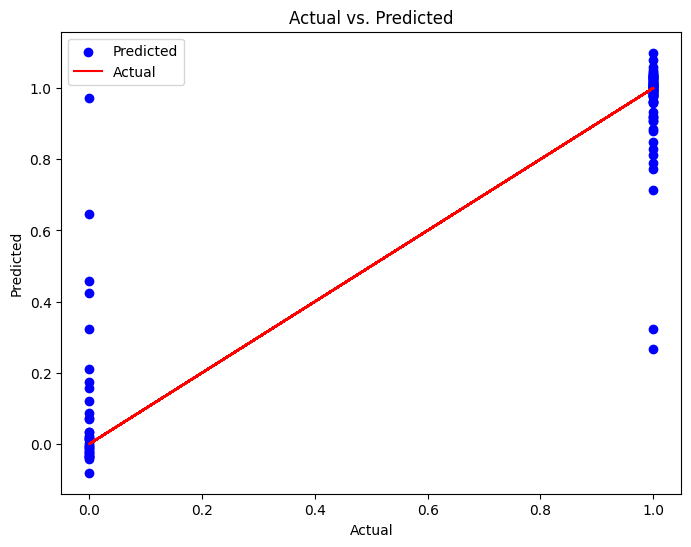

In [9]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Convert the target column to categorical
df['target'] = df['target'].astype('category')

# Initialize H2O
h2o.init()

# Convert the pandas DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(df)

# Split data into training and testing sets
train, test = h2o_df.split_frame(ratios=[0.8])

# Define features and target
features = list(df.columns[:-1])
target = 'target'

# Run AutoML
try:
    aml = H2OAutoML(max_models=10, seed=1)
    aml.train(x=features, y=target, training_frame=train)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb)

    # Get the best model
    best_model = aml.leader

    # Generate predictions
    preds = best_model.predict(test)
    predictions = preds.as_data_frame()

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter(test[target].as_data_frame(), predictions, color='b', label='Predicted')
    plt.plot(test[target].as_data_frame(), test[target].as_data_frame(), color='r', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In this example, we use the H2O AutoML framework to build a model for the iris dataset. We split the data into training and testing sets, run the AutoML process, and generate predictions. Additionally, we visualize the predicted values against the actual values to assess the model's performance.

In [6]:
# Importing necessary libraries
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generating random data
np.random.seed(0)
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# PyTorch Implementation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Define the model, loss function, and optimizer
model = Net()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model
X_train_torch = torch.from_numpy(X_train).float()
y_train_torch = torch.from_numpy(y_train).view(-1, 1).float()
for epoch in range(500):
    optimizer.zero_grad()
    output = model(X_train_torch)
    loss = criterion(output, y_train_torch)
    loss.backward()
    optimizer.step()

# Scikit-learn Implementation
from sklearn.neural_network import MLPClassifier
scikit_model = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)
scikit_model.fit(X_train, y_train)

# TensorFlow Implementation
tf_model = Sequential([
    Dense(5, activation='relu', input_shape=(5,)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tf_model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=0)

# Evaluate all models
X_test_torch = torch.from_numpy(X_test).float()
with torch.no_grad():
    predicted_torch = model(X_test_torch).numpy().flatten()
predicted_sklearn = scikit_model.predict(X_test)
predicted_tf = tf_model.predict(X_test).flatten().round()

# Print accuracies
print("PyTorch Accuracy:", accuracy_score(y_test, (predicted_torch > 0.5).astype(int)))
print("Scikit-learn Accuracy:", accuracy_score(y_test, predicted_sklearn))
print("TensorFlow Accuracy:", accuracy_score(y_test, predicted_tf))


1/1 [==============================] - 0s 164ms/step
PyTorch Accuracy: 0.45
Scikit-learn Accuracy: 0.5
TensorFlow Accuracy: 0.5


# Conclusion
Automated Machine Learning (AutoML) has revolutionized the field of machine learning, enabling users to build sophisticated models without extensive expertise. By automating the model development process, AutoML streamlines complex tasks, making machine learning more accessible and efficient. As seen in the example using the H2O AutoML framework, AutoML tools empower users to create powerful models and gain valuable insights from their data with minimal effort. With its increasing capabilities, AutoML is poised to drive innovation and accelerate the adoption of machine learning across diverse domains.